## Deriving Insights from Data Driven Questions to Drive Business Performance at the Chinook Music Store

### Conecting to the Database

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

### Getting familiar with the data

In [2]:
%%sql
SELECT name, type
  FROM sqlite_master
 WHERE type IN ("table", "view");  

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


### The Database Schema

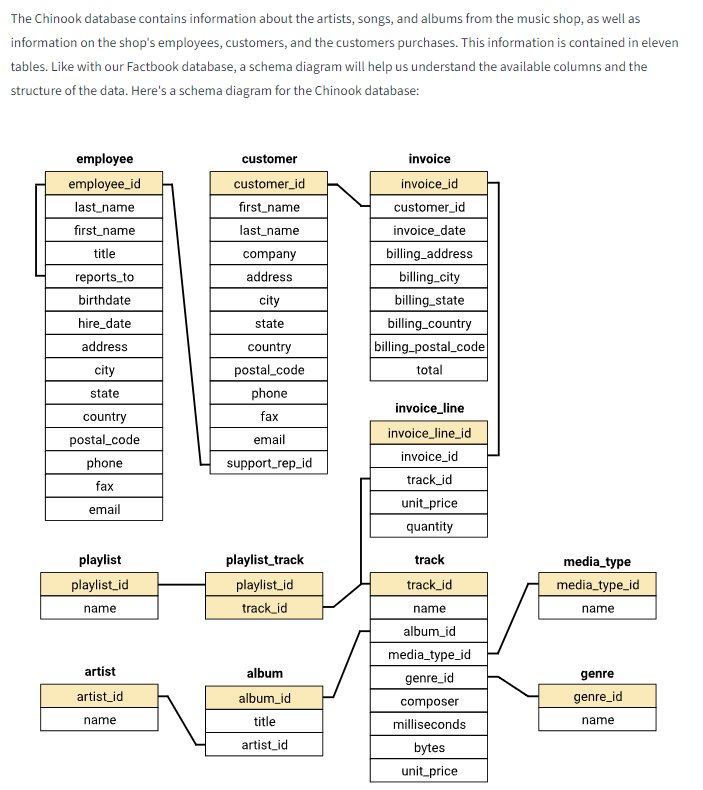


#### Exploring the database

In [3]:
%%sql
SELECT e.*, c.*
  FROM employee e
       INNER JOIN customer c 
       ON e.employee_id = c.support_rep_id
 LIMIT 5

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email,customer_id,first_name_1,last_name_1,company,address_1,city_1,state_1,country_1,postal_code_1,phone_1,fax_1,email_1,support_rep_id
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [4]:
%%sql
SELECT *
  FROM invoice 
 LIMIT 5

 * sqlite:///chinook.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


-----

## Providing Data Driven Answers to Business Questions by Querying the database

### Scenario 1:

The Chinook record store has just signed a deal with a new record label and we've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have tracks in the store right now - we've been provided the artist names and the genre of music they produce as follows:

| Artist Name           | Genre                               |
| --------------------- | -----------                               |
| "Regal"                  | Hip-Hop                                   |
|  "Red Tone"         | Punk                                  |
|  "Meteor and the Girls"         | Pop                          |
|  "Slim Jim Bites"           | Blues                            |



They are all artists from the USA.


**Data Analysis Task 1 / Business Question 1**
 - Which genres currently bring in the most revenue in the USA?

In [5]:
%%sql
-- Writing a temporary view query table
WITH 
    usa AS
    (
        SELECT * 
          FROM customer
         WHERE country = "USA"
    ),
    
    us_genres AS
    (
        SELECT u.country,
               u.customer_id,
               i.total,
               g.name genres,
               t.track_id
          FROM usa u
               INNER JOIN invoice i ON u.customer_id = i.customer_id
               INNER JOIN invoice_line il ON i.invoice_id = il.invoice_id
               INNER JOIN track t ON il.track_id = t.track_id
               INNER JOIN genre g ON t.genre_id = g.genre_id
    )
    

SELECT 
       us.country,
       SUM(us.total) total_revenue,
       us.genres,
       COUNT(us.track_id) no_of_tracks
  FROM us_genres us
 GROUP BY 3
 ORDER BY 2 DESC


 * sqlite:///chinook.db
Done.


country,total_revenue,genres,no_of_tracks
USA,5568.750000000005,Rock,561
USA,1234.5300000000018,Alternative & Punk,130
USA,1025.6399999999985,Metal,124
USA,633.5999999999997,R&B/Soul,53
USA,453.4199999999998,Blues,36
USA,369.2700000000002,Alternative,35
USA,366.3,Hip Hop/Rap,20
USA,201.95999999999992,Pop,22
USA,162.36,Latin,22
USA,125.73,Jazz,14


#### Interpretation of Query Result for Business Question 1

The 3 artist with the album genres of 'Punk', 'Blues' and 'Hip Hop' are the ones that would bring in most value for the store as well as potentially sell the most tracks on the store. Nevertheless, in accordance with the total revenue generation per genre, it appears that Hip Hop is generally valued higher than Pop in the US despite there being a slightly lower number of tracks sold for Hip Hop overall.


#### Prescribed Action:

Add the tracks from the albums belonging to 'Regal', 'Red Tone' & 'Slim Jim Bites' to the store first.

------

### Scenario 2

Each customer for the Chinook store gets assigned to a sales supoort agent within the company when they first make a purchase.
We have been asked to analyze the purchases of customers belonging to each employee to see if there are sales support agents that are performing comparitively better or worse within the group.


We would also like to investigate whether any extra columns from the employee table help explain any variance we see or whether the variance might instead be indicative of employee performance ; I.E To detect the presence of correlation variables.


**Data Analysis Task 2 / Business Question 2**
 - Construct a query that finds the total amount of sales assigned to each sales support agent within the company

In [6]:
%%sql
WITH
    total_rev_per_customer AS
    (
        SELECT
               c.support_rep_id,
               c.customer_id,
               SUM(i.total) total_purchase_value 
          FROM customer c
               INNER JOIN invoice i ON c.customer_id = i.customer_id
         GROUP BY 2
    )

SELECT
       e.employee_id,
       e.title,
       e.first_name||" "||e.last_name employee_name, 
       e.hire_date,
       SUM(trc.total_purchase_value) total_sales
  FROM total_rev_per_customer trc
       INNER JOIN employee e ON trc.support_rep_id = e.employee_id
 GROUP BY 1
 ORDER BY 5 DESC


 * sqlite:///chinook.db
Done.


employee_id,title,employee_name,hire_date,total_sales
3,Sales Support Agent,Jane Peacock,2017-04-01 00:00:00,1731.5099999999998
4,Sales Support Agent,Margaret Park,2017-05-03 00:00:00,1584.0000000000002
5,Sales Support Agent,Steve Johnson,2017-10-17 00:00:00,1393.92


In [7]:
%%sql
/*Confirming that these are the only 3 Sales Support Agents in the company*/
SELECT 
       e.employee_id, 
       e.first_name||" "||e.last_name employee_name
  FROM employee e
 WHERE e.title = "Sales Support Agent"


 * sqlite:///chinook.db
Done.


employee_id,employee_name
3,Jane Peacock
4,Margaret Park
5,Steve Johnson


#### Interpretation of Query Result for Business Question 2

There is indeed variation in the total amount of sales brought in by each sales agent within the company but this is not likely to be as a result of significant variation in employee performance. Instead, it may simply be owing to the date at which each employee was hired and actually started working as a Sales Agent.

Thus far Jane, being hired the earliest, (April 1st of 2017) has been naturally affored the longest time to interact and build fruitful relationships with potential customers and this is reflected in her having the highest amount of revenue brought in through customer sales. The same is true of Margret Park who was brought in a short while after (1 month) who produced the second highest amount of customer revenue followed by Steve who was hired last.

Nevertheless, because this data represents information captured at a 'snapshot' in time and is not continuous or time series in nature, without having the time at which this data was actually recorded, objectively assessing individual employee performance cannot be done.


#### Prescribed Action:

Instead of measuring total sales brought in by each sales agent relatively , measure it objectively against time to determine if each is individually: *increasing in competency, decreasing in compentency or constant* and provide the assistance or accountability resources necessary to grow and maintain a professional and standard level of productivity for each agent accordingly.

____


### Scenario 3

We would like to analyze the sales data from customers for each country. In this Business task we have also been given the directive to use the 'country' value from the *customers* table and ignore the 'country' value from the billing address in the invoice table.   



**Data Analysis Task 3 / Business Question 3**

For each country, the following must be calculated to include in our analysis:

    - total number of customers
    - total value of sales
    - average value of sales per customer
    - average order value
    

**Company guidelines for the Data Analysis**

- Because there are a number of countries with only one customer, we ought to group these customers as "Other" in our analysis.   We can also use the following trick to 'force' the ordering of "Other" to last in our analysis.



**Setting up the queries**


In [8]:
%%sql
DROP VIEW IF EXISTS customers_per_country;
CREATE VIEW customers_per_country AS
    SELECT 
          country,
          COUNT(customer_id) no_of_customers
     FROM customer
    GROUP BY 1;
    

-- Some temporary View Tables to claculate all the data
WITH 
    country_groups AS
      (
        SELECT
              cpc.*,
              CASE
                  when cpc.no_of_customers = 1 THEN 'Other'
                  ELSE 'Country'
              END AS country_type
         FROM customers_per_country cpc
      ),
        
    total_per_customer AS
      (
          SELECT 
                 i.customer_id,
                 SUM(i.total) sales_per_customer,
                 ROUND(il.unit_price * il.quantity, 2) order_value, 
                 c.country
            FROM customer c
                 INNER JOIN invoice i ON c.customer_id = i.customer_id
                 INNER JOIN invoice_line il ON i.invoice_id = il.invoice_id
           GROUP BY 1
      ),
        
    
    total_per_country AS
      (
          SELECT
                 tpc.country,
                 ROUND(SUM(sales_per_customer), 2) total_sales_value,
                 ROUND(SUM(order_value), 2) total_order_value,
                 cg.country_type
            FROM total_per_customer tpc
                 INNER JOIN country_groups cg ON cg.country = tpc.country
           GROUP BY 1
      )
        
    


-- Query producing the final report        
SELECT 
      tpc.country,
      tpc.country_type market_size,
      tpc.total_sales_value,
      tpc.total_order_value,
      cpc.no_of_customers total_customers,
      ROUND((tpc.total_sales_value / cpc.no_of_customers), 2) avg_sales_value,
      ROUND((tpc.total_order_value / cpc.no_of_customers), 2) avg_order_value
 FROM total_per_country tpc
      INNER JOIN customers_per_country cpc ON cpc.country = tpc.country
ORDER BY tpc.total_sales_value DESC 
       

 * sqlite:///chinook.db
Done.
Done.
Done.


country,market_size,total_sales_value,total_order_value,total_customers,avg_sales_value,avg_order_value
USA,Country,10405.89,12.87,13,800.45,0.99
Canada,Country,5489.55,7.92,8,686.19,0.99
Brazil,Country,4059.0,4.95,5,811.8,0.99
France,Country,3972.87,4.95,5,794.57,0.99
Germany,Country,3441.24,3.96,4,860.31,0.99
Czech Republic,Country,3183.84,1.98,2,1591.92,0.99
United Kingdom,Country,2498.76,2.97,3,832.92,0.99
India,Country,1887.93,1.98,2,943.97,0.99
Portugal,Country,1755.27,1.98,2,877.64,0.99
Ireland,Other,1433.52,0.99,1,1433.52,0.99


In [9]:
%%sql
-- Verifying there are only 24 countries in the database
SELECT 
      COUNT(DISTINCT(country)) 'Number of Countries'
 FROM customer

 * sqlite:///chinook.db
Done.


Number of Countries
24



---

____


### Scenario 4

In the Chinook store, customers make purchases in one of two ways: 
1) Purchase a whole album

2) Purchase a collection of one or more individual tracks

Management is currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies instead of purchasing every track from an album ( I.E the entire album).









**Data Analysis Task 4 / Business Question 4**

As the company's data analyst, you have been asked to find out:
What percentage of purchases are indivdual tracks vs whole albums? 

The answer to such a question would help management forecast the effect the proposed decision to change purchasing strategy might have on overall revenue.




**Company guidelines for the Data Analysis**

- Safely ignore the 2 'edge' cases' which would usually prevent us from getting a 100% accurate answer to the business question.

   1) Albums that have only 1 or 2 tracks are likely to be purchased by customers as part of a collection of individual tracks.
   
   2) Customers may decide to manually select every track from an album, and then add a few indivdual tracks from other albums to their purchase.
   

*Reason for Ignoring*

In edge case one, since our analysis is concerned with maximizing revenue, we can safely ignore albums consisting of only a few (2 or less) tracks and for the second case a previous analysis was done to alleviate the occurence of this issue.


*Further Guidelines:*

To answer the business question it is suggested that we begin with first identifying whether each invoice has all the tracks from a particular album. We can do this by getting the list of tracks from an invoice and comparing it to the list of tracks from an album.
 

### Building the 2 Views - Album Tracks & Invoice Tracks

In [10]:
%%sql
DROP VIEW IF EXISTS album_tracks;
CREATE VIEW album_tracks AS
    SELECT 
          a.album_id,  
          t.name,
          t.track_id    
     FROM album a
          INNER JOIN track t ON a.album_id = t.album_id
    ORDER BY 1;

    
DROP VIEW IF EXISTS invoice_tracks;
CREATE VIEW invoice_tracks AS
    SELECT 
          i.invoice_id,  
          il.track_id,
          t.album_id    
     FROM invoice i
          INNER JOIN invoice_line il ON i.invoice_id = il.invoice_id
          INNER JOIN track t ON il.track_id = t.track_id
    ORDER BY 1;


 * sqlite:///chinook.db
Done.
Done.
Done.
Done.


[]

In [11]:
%%sql
-- Briefly viewing the invoice_tracks table
SELECT * FROM invoice_tracks

 * sqlite:///chinook.db
Done.


invoice_id,track_id,album_id
1,1158,91
1,1159,91
1,1160,91
1,1161,91
1,1162,91
1,1163,91
1,1164,91
1,1165,91
1,1166,91
1,1167,91


#### Creating the necessary temporary views and calculating summary statistics

In [12]:
%%sql

WITH 
     -- Separating each invoice by computing the average album_id number. 
     -- If it is an album purchase, its average album value - its maximum album value should be 0 as these values would be equal.
    invoice_type AS
    (
     SELECT  
            invoice_id,
            AVG(album_id) - MAX(album_id),
            CASE
                 WHEN AVG(album_id) - MAX(album_id) = 0 THEN 'album purchase'
                 ELSE 'track purchases'
            END AS type_of_purchase
       FROM invoice_tracks
      GROUP BY 1    
    )
    

-- Calculating summary statistics
SELECT 
       type_of_purchase,
       COUNT(invoice_id) total_number_of_invoices,
       ROUND(COUNT(invoice_id) * 1.0 / (SELECT COUNT(invoice_id) total FROM invoice_type),2) AS percentage  
  FROM invoice_type
 GROUP BY 1

 * sqlite:///chinook.db
Done.


type_of_purchase,total_number_of_invoices,percentage
album purchase,171,0.28
track purchases,443,0.72


### Recommendation Based on Findings

Based on the significant percentage difference in current client purchases, Chinook mangement can proceed with the proposed change in purchasing strategy. The decision and can be implemented and the change monitored in the short term for any unforseen changes in consumer taste.